<a href="https://colab.research.google.com/github/matiaslarregle/UNaB/blob/main/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inferencia Estadística

Alumnos: Cardozo Rodrigo, Larregle Matias, Levy Lara y Tarizzo Facundo

**Regresión logística - Clasificación**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar base de datos a drive
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/regresión.csv"

df = pd.read_csv(url)

Mounted at /content/drive


In [ ]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


clase
0    86
2    44
1    40
Name: count, dtype: int64


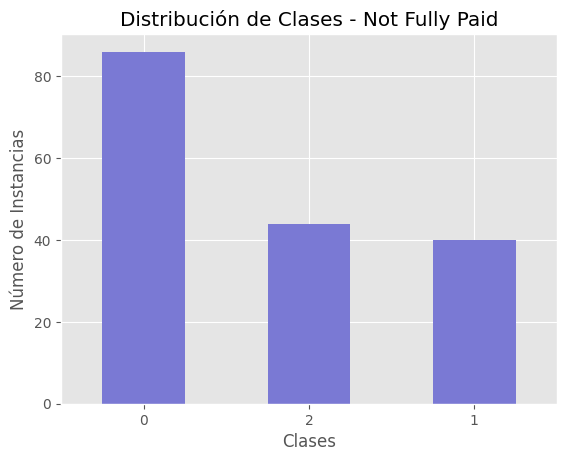

clase
0    0.505882
2    0.258824
1    0.235294
Name: count, dtype: float64


In [ ]:
#Contar las Clases
class_counts = df['clase'].value_counts()
print(class_counts)

#Visualizar la Distribución
class_counts.plot(kind='bar', color='#7a79d4')
plt.title('Distribución de Clases - Not Fully Paid')
plt.xlabel('Clases')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)
plt.show()

#Calcular Proporciones
proportions = class_counts / len(df)
print(proportions)

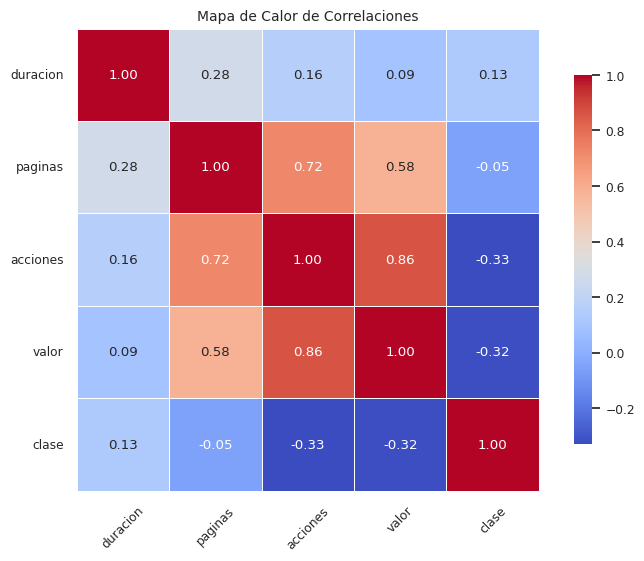

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor tipo cuadriculado para la correlación
plt.figure(figsize=(9, 6))
sns.set(font_scale=0.8)  # Aumentar tamaño de fuente
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                      square=True, cbar_kws={"shrink": .8},
                      linewidths=0.5)  # Cuadrícula
plt.title('Mapa de Calor de Correlaciones', fontsize=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df.mean(axis=0)

----------------------
Media de cada variable
----------------------


,0
duracion,111.075729
paginas,2.041176
acciones,8.723529
valor,32.676471
clase,0.752941


In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


,0
duracion,40987.298106
paginas,2.252732
acciones,83.467490
valor,2002.740863
clase,0.707832


In [ ]:
# Separar características y etiqueta
X = df.drop('clase', axis=1)
y = df['clase']

In [ ]:
# Dividir el conjunto de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)

In [ ]:
# Crear una instancia del modelo (usando los parámetros predeterminados)
logreg = LogisticRegression(random_state=16)

# Entrenamos el modelo
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# Calculamos matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[22,  0,  4],
       [ 9,  2,  0],
       [ 0,  0,  6]])

Text(0.5, 427.9555555555555, 'Predicción')

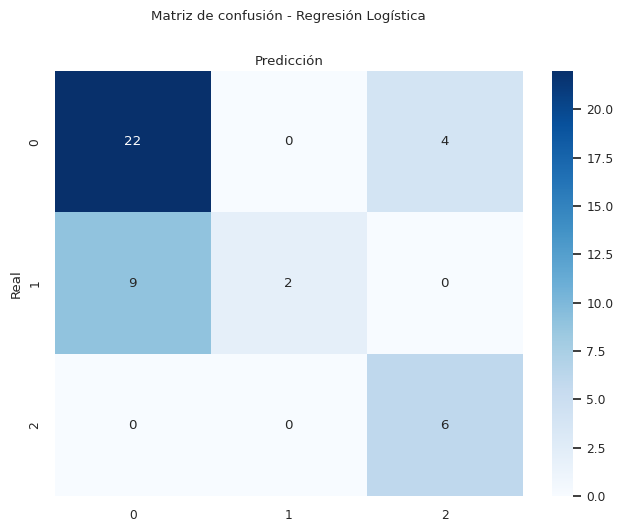

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Crear mapa de calor
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
# Configurar etiquetas y título
plt.title('Matriz de confusión - Regresión Logística', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [ ]:
# Mostramos informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       1.00      0.18      0.31        11
           2       0.60      1.00      0.75         6

    accuracy                           0.70        43
   macro avg       0.77      0.68      0.61        43
weighted avg       0.77      0.70      0.65        43



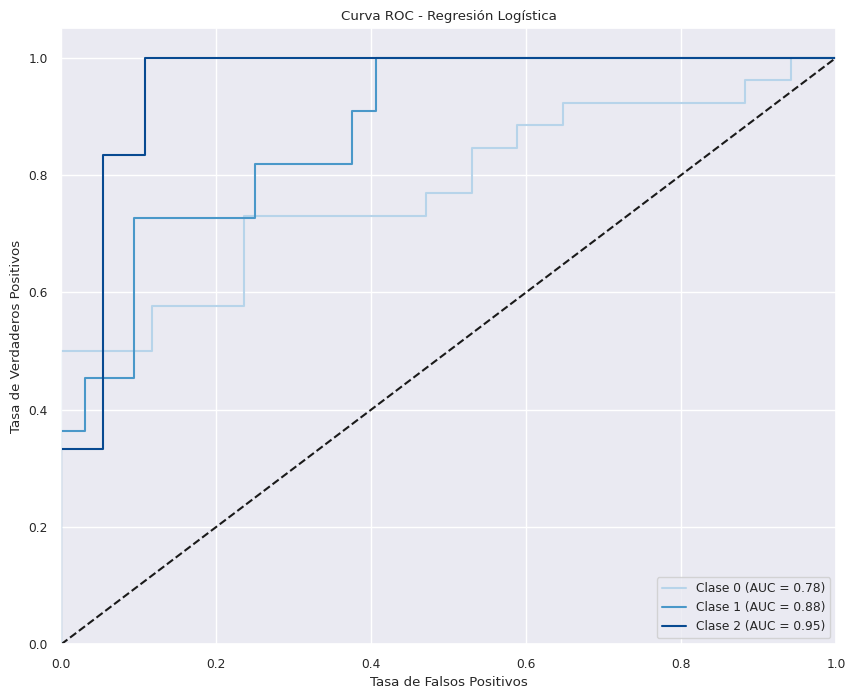

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Asegúrate de que las clases estén correctas
y_pred_proba = logreg.predict_proba(X_test)

# Calcular las curvas ROC para cada clase
fpr, tpr, roc_auc = {}, {}, {}
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))

for i in range(3):  # Ajustar según el número de clases
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):  # Ajustar según el número de clases
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

**Regresión Logística con PCA**

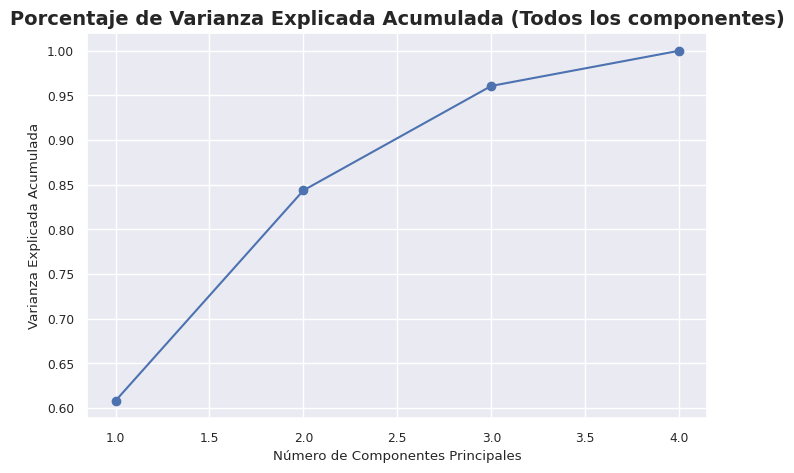

Componentes 1: 0.61
Componentes 2: 0.84
Componentes 3: 0.96
Componentes 4: 1.00
Confusion Matrix:
 [[18  0  8]
 [ 7  0  4]
 [ 1  0  5]]


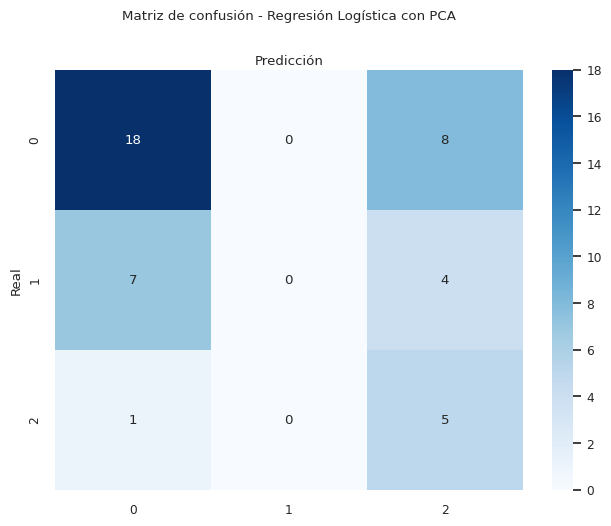

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.00      0.00      0.00        11
           2       0.29      0.83      0.43         6

    accuracy                           0.53        43
   macro avg       0.33      0.51      0.38        43
weighted avg       0.46      0.53      0.48        43



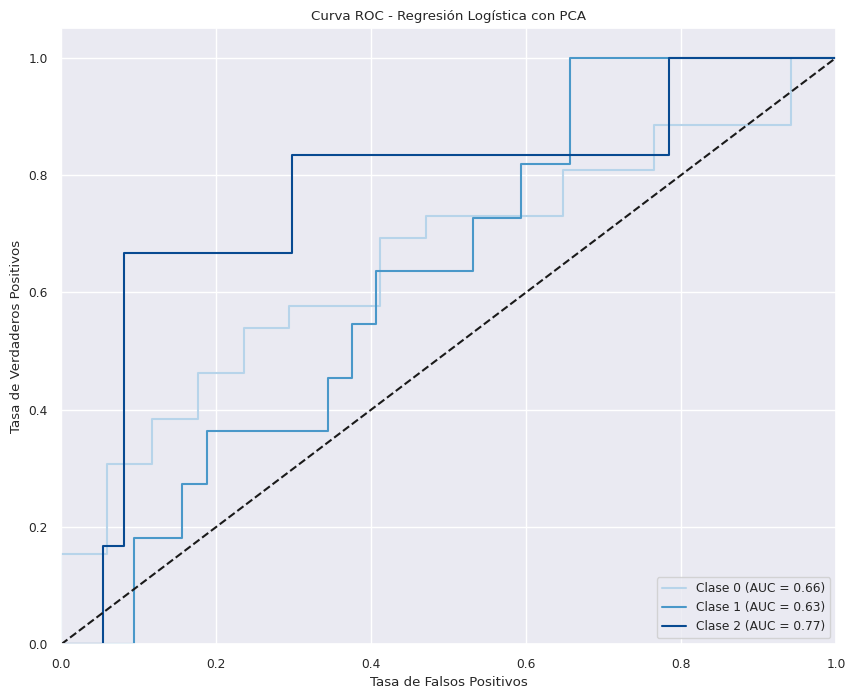

In [ ]:
# Separar características y etiqueta
X = df.drop('clase', axis=1)
y = df['clase']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA (con el número máximo de componentes disponibles)
pca = PCA()
X_train_pca_all = pca.fit_transform(X_train_scaled)
X_test_pca_all = pca.transform(X_test_scaled)

# Calcular la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada para TODOS los componentes
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Porcentaje de Varianza Explicada Acumulada (Todos los componentes)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

# Imprimir la varianza acumulada para cada componente
for i, cumulative_variance in enumerate(np.cumsum(explained_variance_ratio)):
    print(f'Componentes {i+1}: {cumulative_variance:.2f}')

# Ahora, seleccionamos un número específico de componentes para usar en otros análisis
n_components = 2  # Puedes elegir el número de componentes que prefieras
pca_selected = PCA(n_components=n_components)
X_train_pca = pca_selected.fit_transform(X_train_scaled)
X_test_pca = pca_selected.transform(X_test_scaled)

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_pca, y_train)

# Predecimos
y_pred = logreg.predict(X_test_pca)

# Calculamos la matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)

# Visualizamos la matriz de confusión
class_names = [0, 1]
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión - Regresión Logística con PCA', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Curva ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Asegúrate de que las clases estén correctas
y_pred_proba = logreg.predict_proba(X_test_pca)

# Calcular las curvas ROC para cada clase
fpr, tpr, roc_auc = {}, {}, {}
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))

for i in range(3):  # Ajustar según el número de clases
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):  # Ajustar según el número de clases
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística con PCA')
plt.legend(loc="lower right")
plt.show()